In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.pandas.set_option('display.max_columns',None) #To make sure all the columns are displayed

In [2]:
#Readilah the dataset
dataset = pd.read_csv(r"C:\Users\Fadilah Thasnim\Desktop\Academics\6 - Semester\3. ML\Lab\KMeans\Credit Card Customer Data.csv")
dataset.head() #Check the head of the dataframe

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [3]:
dataset.info() #Total 660 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


C:\Users\Fadilah Thasnim\AppData\Local\Temp\ipykernel_5788\994978310.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[feature]) #Checking the distributions of the interactions


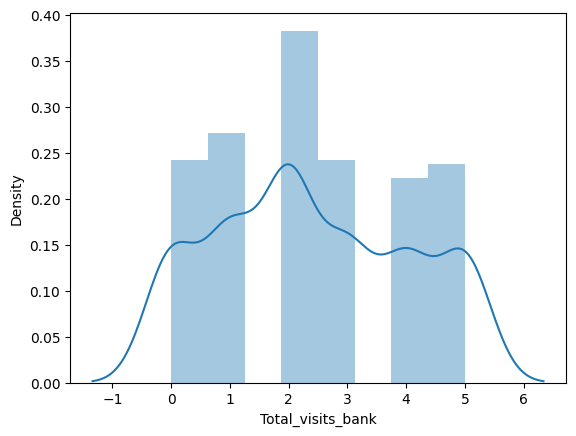

C:\Users\Fadilah Thasnim\AppData\Local\Temp\ipykernel_5788\994978310.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[feature]) #Checking the distributions of the interactions


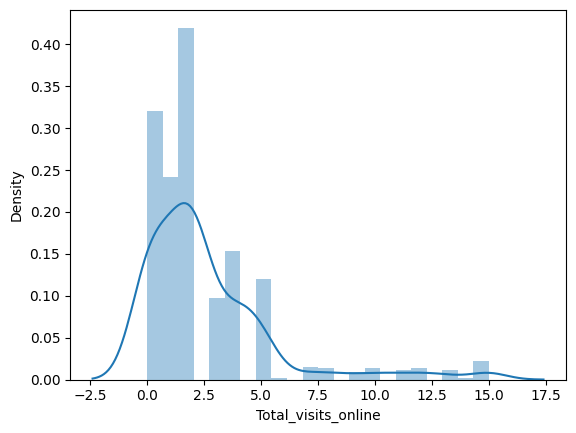

C:\Users\Fadilah Thasnim\AppData\Local\Temp\ipykernel_5788\994978310.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[feature]) #Checking the distributions of the interactions


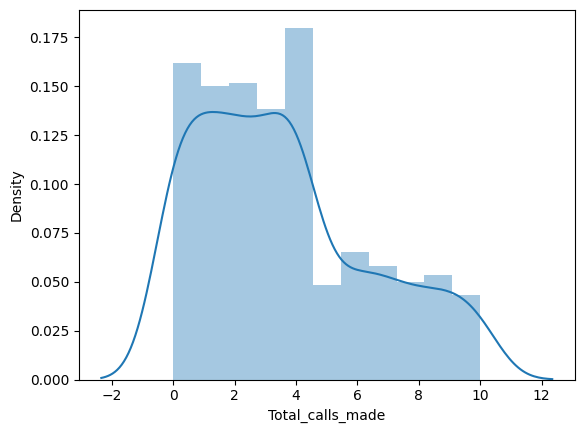

In [4]:
features = ['Total_visits_bank','Total_visits_online','Total_calls_made']
for feature in features:
    sns.distplot(dataset[feature]) #Checking the distributions of the interactions
    plt.show()

In [5]:
dataset.drop(['Sl_No','Customer Key'],axis=1).describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


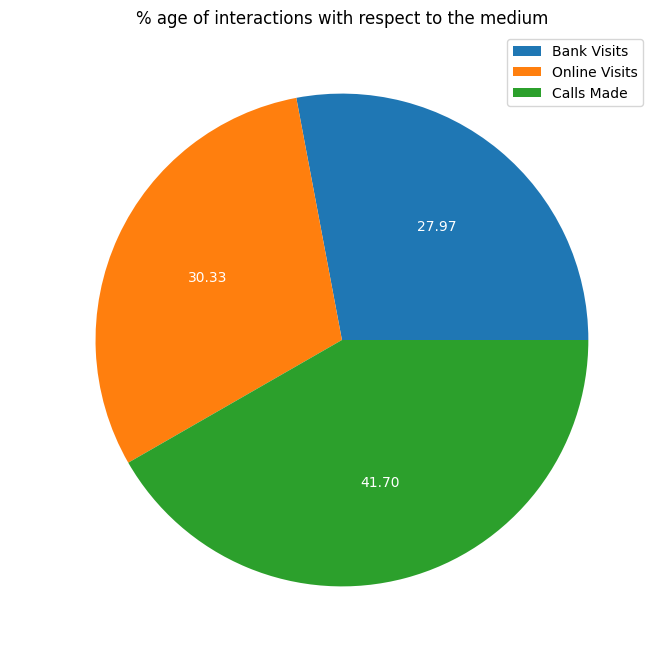

In [6]:
### Creating a new feature with total interaction with banks  for analysis
data=dataset.copy() #Copying the dataset into a new memory
data['Total_interactions'] = data['Total_visits_bank'] + data['Total_visits_online'] + data['Total_calls_made']
# Total interactions = total calls + totals visits in banks + total online visits
plt.figure(figsize=(12,8))
feature_perc=[]
for feature in features:
    feature_perc.append((data[feature].sum()/data['Total_interactions'].sum())*100)
plt.pie(feature_perc,labels=['Bank Visits','Online Visits','Calls Made'],autopct='%1.2f',textprops=dict(color="w"))
plt.legend()
plt.title("% age of interactions with respect to the medium")
plt.show()

In [7]:
#Finding duplicate rows
dataset[dataset.duplicated(subset=None, keep='first')]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made


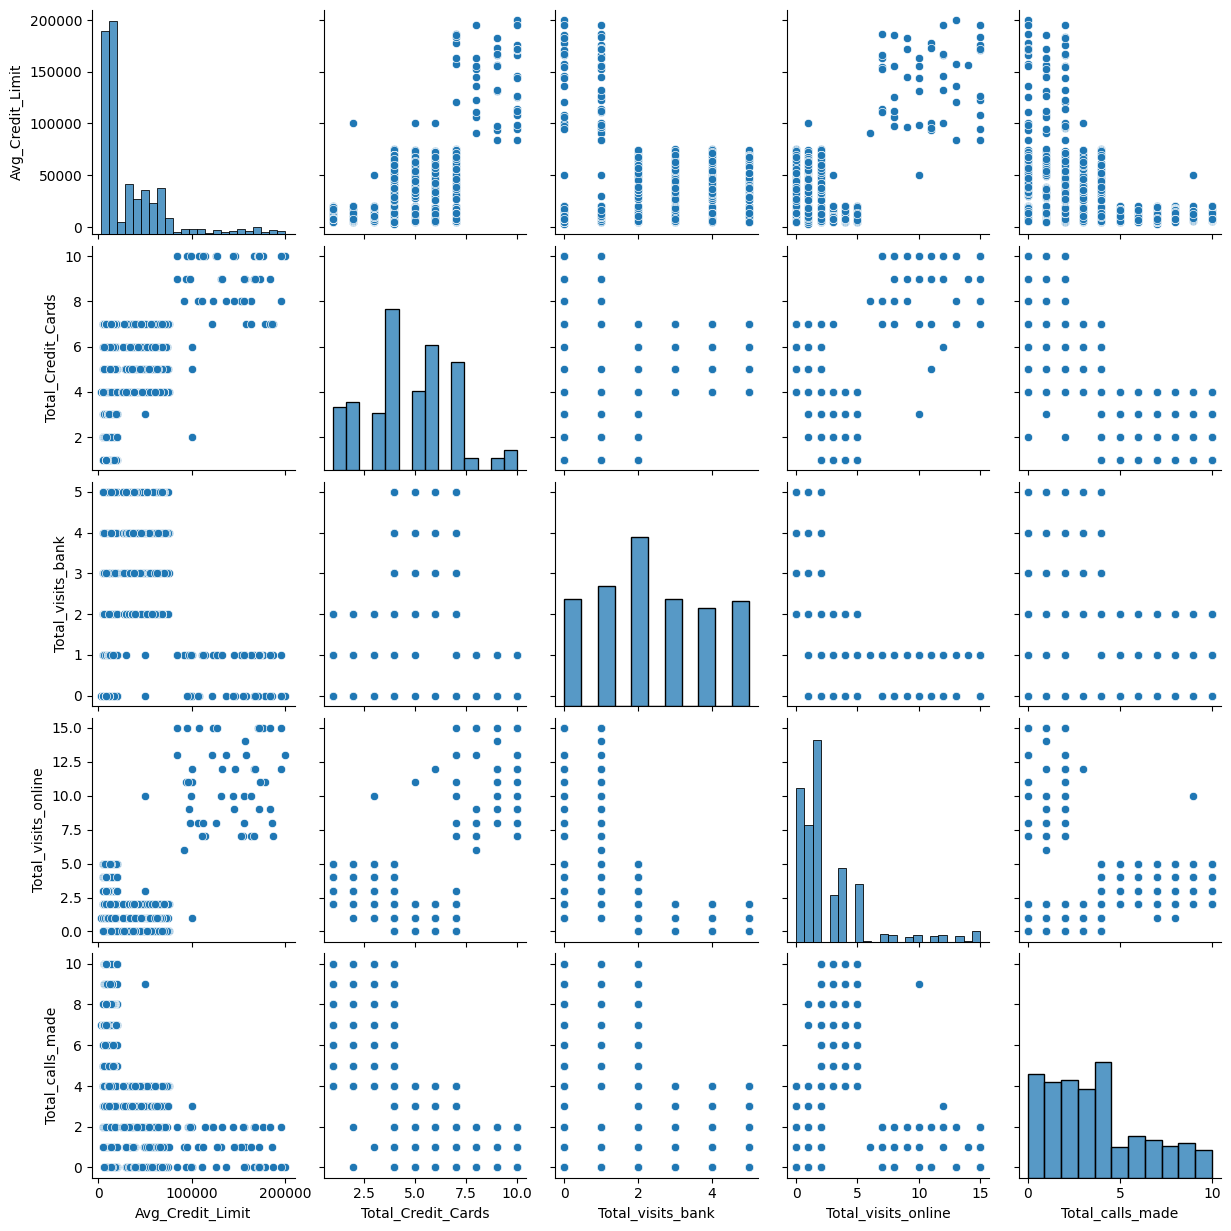

In [8]:
# A pair plot, also known as a scatterplot matrix, is a matrix of graphs that enables the 
# visualization of the relationship between each pair of variables in a dataset. 
# It combines both histogram and scatter plots, providing a unique overview of the 
# dataset's distributions and correlations

# as we are looking for clusters this is very helpful

data = dataset.drop(['Sl_No','Customer Key'],axis=1).copy()
sns.pairplot(data) #Pairplot from seaborn library

In [9]:
data.corr() #Checking the correlation of the features

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000000,0.608860,-0.100312,0.551385,-0.414352
Total_Credit_Cards,0.608860,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,-0.100312,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.551385,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,-0.414352,-0.651251,-0.506016,0.127299,1.000000


Key Observations:
Customers with Avg_Credit_Limit > ~60,000 which maybe loyal customers make fewer calls (0-2.5) than the customers with Avg_Credit_Limit ~10,000 to 25000

Customers with 1-4 Credit Cards make more than 5 calls (5-10)

People with lower limit, makes more visits to the bank

Customers who visits banks less frequently makes more phone calls10

<Axes: xlabel='Avg_Credit_Limit', ylabel='Total_Credit_Cards'>

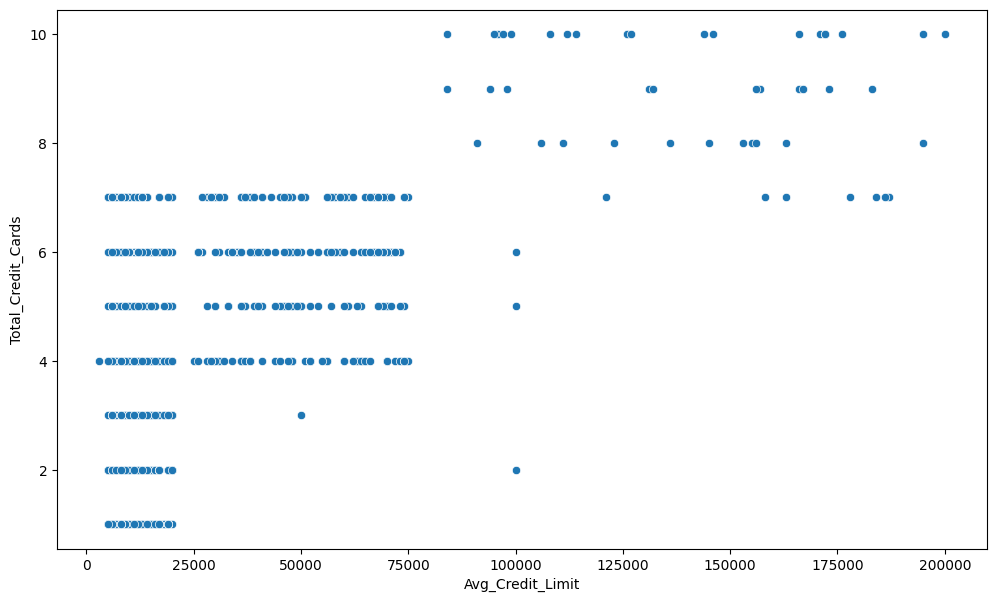

In [10]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Avg_Credit_Limit',y='Total_Credit_Cards',data=dataset)

# There clearly seems to be differentiated 2 clusters on the basis of above two features
# People with Average Credit Limit >75000 visits more frequently online(>7 times)

<Axes: xlabel='Total_visits_online', ylabel='Total_Credit_Cards'>

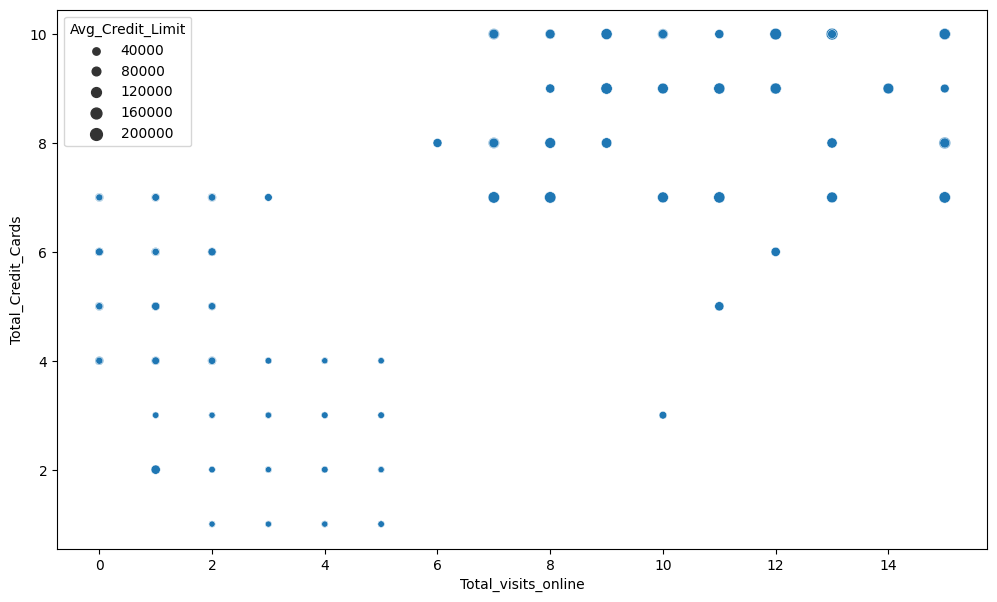

In [11]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Total_visits_online',y='Total_Credit_Cards',size='Avg_Credit_Limit',data=dataset) 

#There seems to be two differentiable clusters on the basis of above two features
# Customers with more than 7 credit cards and with Average Limit > 80000 visits online more frequently

<Axes: xlabel='Total_visits_online', ylabel='Total_calls_made'>

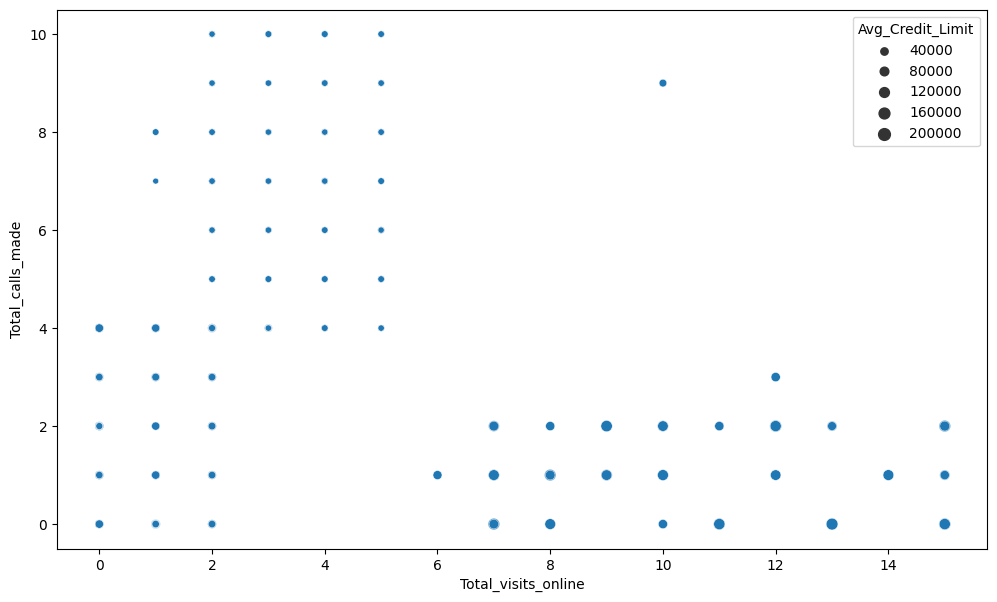

In [12]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Total_visits_online',y='Total_calls_made',size='Avg_Credit_Limit',data=dataset) 

# Dots are sized relative to the Avg_Credit_Limit
# There seems to be cleary two clusters on the above two features
# Customers who visit less frequently online make more phone calls
# People with Average credit limit >80000 make more frequent online visits

Creating a new feature with total interaction with banks for analysis

In [13]:
### Creating a new feature with total interaction with banks  for analysis
data=dataset.copy() #Copying the dataset into a new memory
data['Total_interactions'] = data['Total_visits_bank'] + data['Total_visits_online'] + data['Total_calls_made']
# Total interactions = total calls + totals visits in banks + total online visits

<Axes: xlabel='Avg_Credit_Limit', ylabel='Total_interactions'>

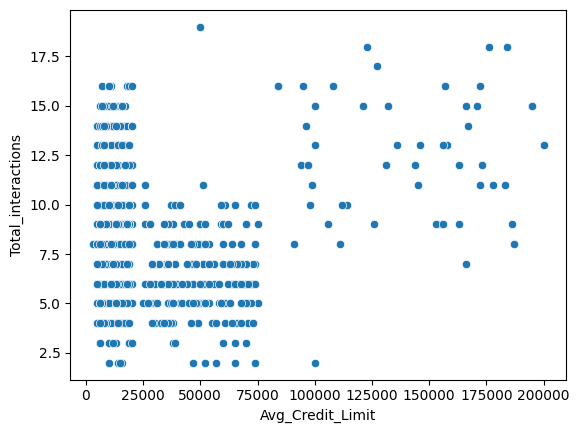

In [14]:
sns.scatterplot(x='Avg_Credit_Limit',y='Total_interactions',data=data)

# Customers can be segmented on the basis of Total interactions or total complaints
# with bank and the average credit limit

In [15]:
# Execute KMeans
X = dataset.iloc[:,2:].values #Selecting the features
X.shape
# As there is a difference in magnitude of Credit Limit and other features, we will scale the features
# As there are not any negative values, we can use MinMaxScaler

(660, 5)

In [16]:
from sklearn.preprocessing import MinMaxScaler #Importing MinMaxScaler
scaler= MinMaxScaler() #Initialising the instance of the scaler
scaled_features = scaler.fit_transform(X) #Storing the scaled version of features in scaled_features

C:\Users\Fadilah Thasnim\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Fadilah Thasnim\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Fadilah Thasnim\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Fadilah Thasnim\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_in

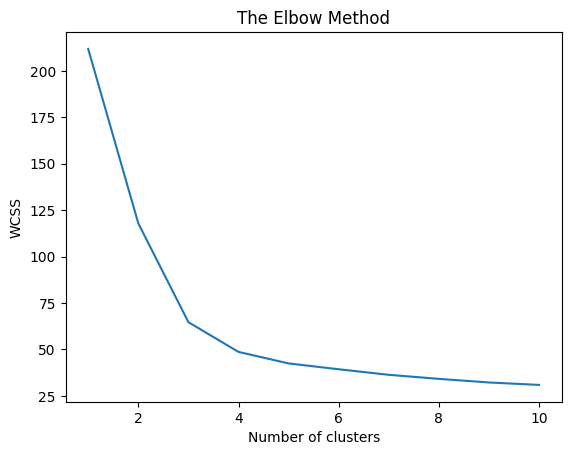

In [17]:
from sklearn.cluster import KMeans #Importing KMeans from sklearn
wcss = [] #Within cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42) #Initialising 
    kmeans.fit(scaled_features) #Fitting on scaled features
    wcss.append(kmeans.inertia_) #Appending the wcss to the blank list
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show() 

In [18]:
## Training the K-Means model on the dataset
from yellowbrick.cluster import SilhouetteVisualizer
kmeans=KMeans(n_clusters = 3, init = 'k-means++', random_state = 42) #Initialising 
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(scaled_features)        # Fit the data to the visualizer
visualizer.show()

ModuleNotFoundError: No module named 'yellowbrick'

In [ ]:
# The Silhouette Visualizer displays the silhouette coefficient for each sample on a per-cluster basis, 
# visually evaluating the density and separation between clusters. The score is calculated by averaging 
# the silhouette coefficient for each sample, computed as the difference between the average intra-cluster 
# distance and the mean nearest-cluster distance for each sample, normalized by the maximum value. 
# This produces a score between -1 and +1, where scores near +1 indicate high separation and scores 
# near -1 indicate that the samples may have been assigned to the wrong cluster.

# https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html

In [22]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[0 0 0 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0
 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 2 0 0
 2 0 2 2 0 0 0 0 0 0 0 0 

C:\Users\Fadilah Thasnim\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
Segment = pd.DataFrame(y_kmeans,columns=['Segment']) #Converting the cluster to data frame
Segment

,Segment
0,0
1,0
2,0
3,2
4,0
...,...
655,0
656,0
657,1
658,1


In [24]:
data=dataset.copy()
data=pd.concat([data,Segment],axis=1)

In [25]:
features = ['Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']

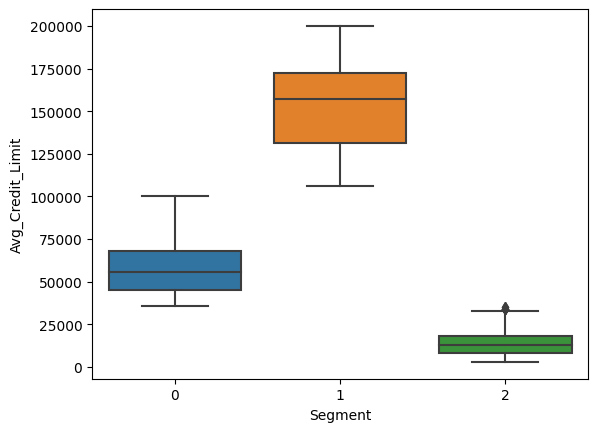

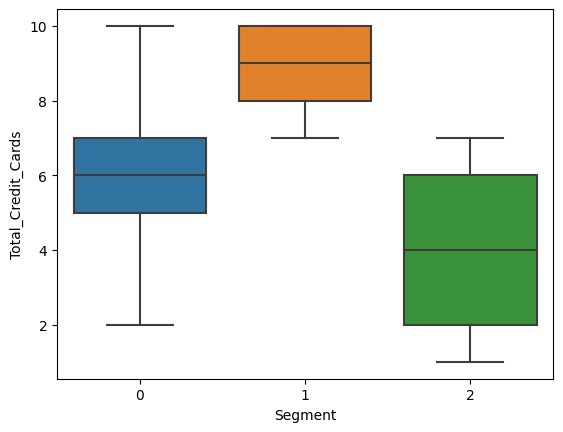

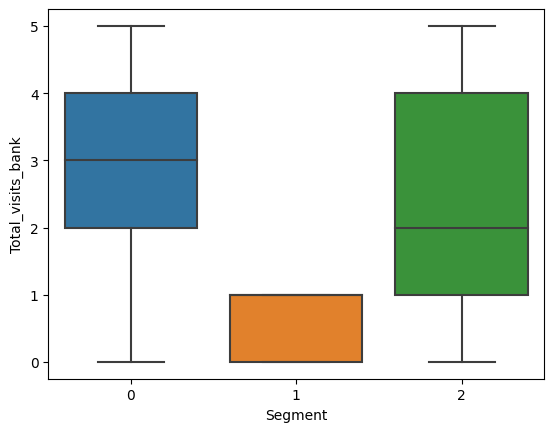

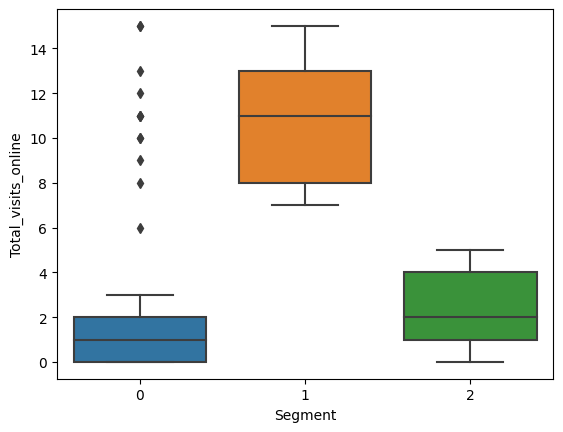

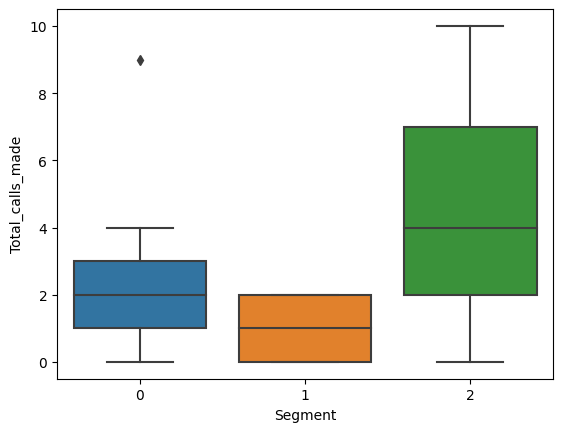

In [26]:
## Analyzing the results
for feature in features:  #Loop to plot boxplot of each cluster
    sns.boxplot(x='Segment',y=feature,data=data)
    plt.show()

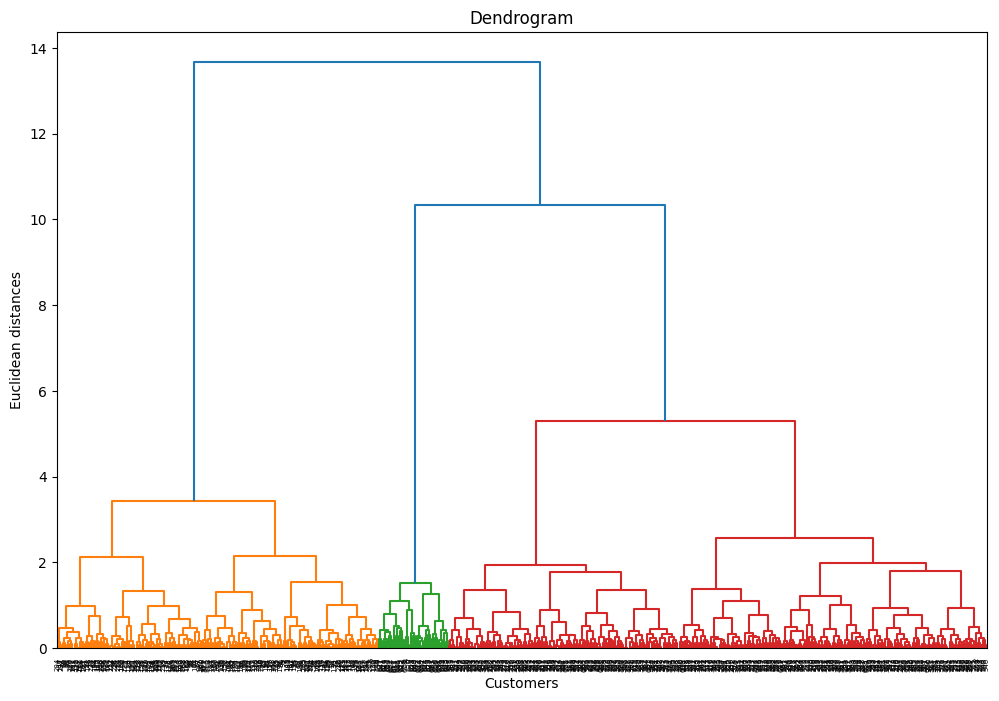

In [27]:
import scipy.cluster.hierarchy as sch #import the library
plt.figure(figsize=(12,8)) #Canvas size
dendrogram = sch.dendrogram(sch.linkage(scaled_features, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [28]:
# https://www.kaggle.com/code/aryashah2k/customer-segmentation-hac-kmeans-rfm-matrix/notebook

In [29]:
from sklearn.metrics import silhouette_score
kmeans_score= silhouette_score(scaled_features,y_kmeans)
kmeans_score

0.14678066169984869

C:\Users\Fadilah Thasnim\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Fadilah Thasnim\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Fadilah Thasnim\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Fadilah Thasnim\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_in

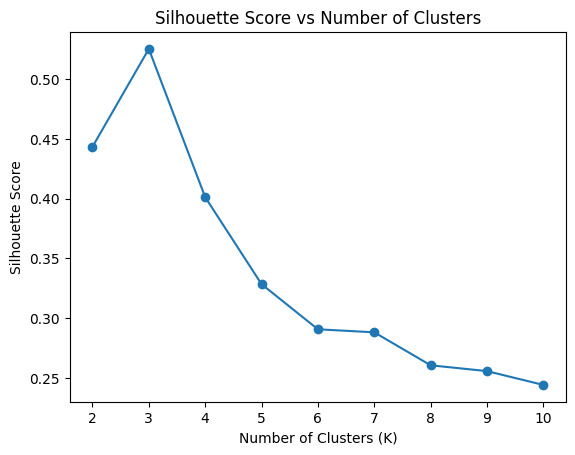

In [31]:
# Define a range of K values
k_values = range(2, 11)  # Assuming you want to try K from 2 to 10

# Initialize an empty list to store silhouette scores
silhouette_scores = []

# Iterate through each K value
for k in k_values:
    # Fit KMeans clustering model
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_features)
    
    # Predict cluster labels
    y_kmeans = kmeans.predict(scaled_features)
    
    # Calculate silhouette score
    score = silhouette_score(scaled_features, y_kmeans)
    
    # Append the silhouette score to the list
    silhouette_scores.append(score)

# Plot the silhouette scores against K values
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

Kmeans Clusters

Segment 0 has low credit limit and more number of total credit cards.
-This maybe the indication that they have high credit usage and low income.
-Segment 0 makes complaints by the medium of phone calls.
-The bank can arrange periodical feedback phone calls from Relationship Managers at the bank
They can be targeted for cross selling by the medium of phone calls

Segment 1 makes
-less number of phone calls
-highest number of online visits
-does not visit the bank at all
-This maybe the indication that Segment 1 is literate and premium customers of the bank with higher income.
Luxury offers through emails and offers related to online shopping or coupons can be targeted to this segment They have the potential of being most profitable customers

Segment 2 have almsot similar characterstics:
-Median of 3 visits to the bank
-Relatively higher visits to the bank
-holds 4-6 Total Credit Cards
Both can targeted for cross selling through in bank managers and promotional advertisements in the bank
Servicescape Promotions are Promotions done in the environment where the service is offered

In [ ]:
#the "Silhouette" method
from sklearn.metrics import silhouette_score

#This function calculates the Silhouette score from the k-means to determine the "elbow" for 
#optimal number of clusters x is the input dataset
#kmax is the maximum number of clusters that will be tested
#This function only works for 2-d situation
#The Silhouette function only works for two or more clusters

def Silhouette(x, kmax):
    sil = [None, None]
    #dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
    fork in range(2, kmax+1):
        kmeans= KMeans(n_clusters = k).fit(x)
        labels=kmeans.labels_
        sil.append(silhouette_score(x, labels, metric='euclidean'))
    return sil

In [30]:
fig = plt.figure(figsize=(19,11))
ax = fig.add_subplot(1, 1, 1)
ax.tick_params(axis='both', which 'major', labelsize=20)
ax.plot(Silhouette (principalDf, 10))
ax.set_xlabel('# of clusters', fontsize=20)
ax.set_ylabel('Silhouette score', fontsize=20)
ax.set_title('Silhouette score by number of clusters', fontsize=25)

SyntaxError: positional argument follows keyword argument (1476061235.py, line 3)